<a href="https://colab.research.google.com/github/juno-yuu/MFE-DAML/blob/main/Problem_Set_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1:
### Simulate 1500 realizations of two uncorrelated standard Normal variables. Call the simulated variables $x_1$and $x_2$ and use these simulated variables as your predictors for y. Simulate 1500 outcomes for y for each of the two models

In [1]:
import os
import pandas  as pd
import seaborn as sns
import numpy   as np
import matplotlib.pyplot       as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy              import dmatrices
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNetCV,ElasticNet
import random
from sklearn.metrics import mean_squared_error
import warnings
from IPython.display import display, Latex
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# mount your Google Drive so you can locate your data files.
from google.colab import drive
drive.mount('/content/drive')#@title

Mounted at /content/drive


In [9]:
# set seed to guarantee the same number
random.seed(123)
x = pd.DataFrame(np.random.normal(size = (1500,2)),columns=['x1','x2'])


a) $y=1.5x_1 -2 x_2 + \varepsilon$

b)  \begin{cases} 
      1.5x_1-2x_2+\varepsilon & x < 0 \\
      1.5ln(x_1)+\varepsilon & x\geq0 
   \end{cases}
where $\varepsilon$ is a Standard Normal uncorrelated with $x_1$ and $x_2$.

Use the first 1000 observations
of x_1, x_2, and y as your training sample and observations 1001-1500 as your test sample.

(i) OLS regression

In [10]:
  x = pd.DataFrame(np.random.normal(size = (1500,2)),columns=['x1','x2'])
  # create y_a
  y_a = pd.DataFrame(1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500),columns=['y_a'])
  # create y_b
  y_b = pd.DataFrame(np.where(x.iloc[:,0] < 0, 1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500), 1.5*np.log(x.iloc[:,0])+np.random.normal(size = 1500)),columns=['y_b'])
  q1_df = pd.concat([x,y_a,y_b],axis=1)
  train_df = q1_df.iloc[0:1000]
  test_df = q1_df.iloc[1000:]

In [11]:
# write a function to the whole process
def NormalGenerator(seed):
  random.seed(seed)
  x = pd.DataFrame(np.random.normal(size = (1500,2)),columns=['x1','x2'])
  # create y_a
  y_a = pd.DataFrame(1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500),columns=['y_a'])
  # create y_b
  y_b = pd.DataFrame(np.where(x.iloc[:,0] < 0, 1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500), 1.5*np.log(x.iloc[:,0])+np.random.normal(size = 1500)),columns=['y_b'])
  q1_df = pd.concat([x,y_a,y_b],axis=1)
  train_df = q1_df.iloc[0:1000]
  test_df = q1_df.iloc[1000:]
  out_a = smf.ols('y_a~x1+x2', data = train_df).fit()
  y_pred_a = out_a.predict(test_df.iloc[:,0:2])
  mse_a = mean_squared_error(test_df['y_a'], y_pred_a)
  out_b = smf.ols('y_b~x1+x2', data = train_df).fit()
  y_pred_b = out_b.predict(test_df.iloc[:,0:2])
  mse_b = mean_squared_error(test_df['y_b'], y_pred_b)
  return mse_a,mse_b

In [12]:
# repeat simulation for 500 times
mse = pd.DataFrame()
for i in range(500):
  mse[i] = NormalGenerator(i)

Text(0, 0.5, 'Frequency')

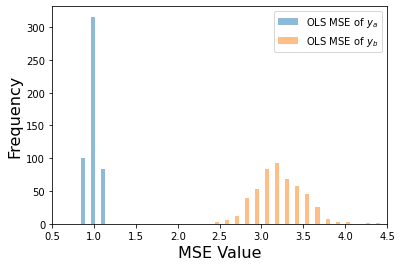

In [16]:
# OLS hist
plt.hist(mse,alpha=0.5,bins=30)
plt.legend(('OLS MSE of $y_a$', 'OLS MSE of $y_b$'), loc='upper right')
plt.xlim(0.5,4.5)
plt.xlabel("MSE Value", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

ii) Random Forest  with n_estimators = 250 and max_depth = 10

In [ ]:
def RandomForestGenerator(seed):
  random.seed(seed)
  x = pd.DataFrame(np.random.normal(size = (1500,2)),columns=['x1','x2'])
  # create y_a
  y_a = pd.DataFrame(1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500),columns=['y_a'])
  # create y_b
  y_b = pd.DataFrame(np.where(x.iloc[:,0] < 0, 1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500), 1.5*np.log(x.iloc[:,0])+np.random.normal(size = 1500)),columns=['y_b'])
  q1_df = pd.concat([x,y_a,y_b],axis=1)
  train_df = q1_df.iloc[0:1000]
  test_df = q1_df.iloc[1000:]
  rf = RandomForestRegressor(n_estimators=250,max_depth=10)
  rf_a = rf.fit(x.iloc[0:1000],train_df['y_a'])
  y_pred_a = rf_a.predict(test_df.iloc[:,0:2])
  mse_a = mean_squared_error(test_df['y_a'], y_pred_a)
  rf_b = rf.fit(x.iloc[0:1000],train_df['y_b'])
  y_pred_b = rf_b.predict(test_df.iloc[:,0:2])
  mse_b = mean_squared_error(test_df['y_b'], y_pred_b)
  return mse_a,mse_b

In [ ]:
mse_rf = pd.DataFrame()
for i in range(500):
  mse_rf[i] = RandomForestGenerator(i)

Text(0, 0.5, 'Frequency')

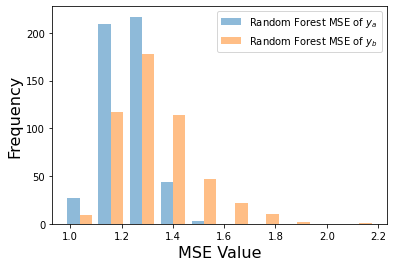

In [ ]:
plt.hist(mse_rf,alpha=0.5)
plt.legend(('Random Forest MSE of $y_a$', 'Random Forest MSE of $y_b$'), loc='upper right');

plt.xlabel("MSE Value", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

(iii) XGBoost with learning_rate=0.3, gamma=0, and max_depth=6; use 20 rounds and 10
folds for the cross-validation procedure. Make sure that the output of the crossvalidation
procedure does not appear in your final write-up.

In [ ]:
def XGBoostGenerator(seed):
  random.seed(seed)
  x = pd.DataFrame(np.random.normal(size = (1500,2)),columns=['x1','x2'])
  # create y_a
  y_a = pd.DataFrame(1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500),columns=['y_a'])
  # create y_b
  y_b = pd.DataFrame(np.where(x.iloc[:,0] < 0, 1.5*x.iloc[:,0]-2*x.iloc[:,1]+np.random.normal(size = 1500), 1.5*np.log(x.iloc[:,0])+np.random.normal(size = 1500)),columns=['y_b'])
  q1_df = pd.concat([x,y_a,y_b],axis=1)
  train_df = q1_df.iloc[0:1000]
  test_df = q1_df.iloc[1000:]
  xgb_regressor = xgb.XGBRegressor(
    booster = "gbtree",             # Which booster to use
    objective = "reg:squarederror", # Specify the learning task
    #n_estimators = 999,             # Number of trees in random forest to fit
    #reg_lambda = 10,                 # L2 regularization term
    gamma = 0,                      # Minimum loss reduction
    max_depth = 6,                  # Maximum tree depth
    learning_rate = 0.3             # Learning rate, eta 
  )
  xgb_parm = xgb_regressor.get_xgb_params()
  # Hyper parameter tuning for XGBOOST using cross-validation (maximal # of trees)
  # XGBoost uses Dmatrices
  xgb_train = xgb.DMatrix(x.iloc[0:1000],label = train_df['y_a'])
  # Cross-validation
  xgb_cvresult = xgb.cv(xgb_parm, xgb_train, 
                      num_boost_round = 20, 
                      metrics = "rmse",
                      nfold = 10,
                      stratified=False, 
                      seed=i,
                      early_stopping_rounds=3)

  # Update parameters (# of trees)
  xgb_regressor.set_params(n_estimators = xgb_cvresult.shape[0])

  # Train the model
  xgb_a = xgb_regressor.fit(x.iloc[0:1000],train_df['y_a'])
  y_pred_a = xgb_regressor.predict(test_df.iloc[:,0:2],ntree_limit = xgb_cvresult.shape[0])
  mse_a = mean_squared_error(test_df['y_a'], y_pred_a)
  xgb_b = xgb_regressor.fit(x.iloc[0:1000],train_df['y_b'])
  y_pred_b = xgb_regressor.predict(test_df.iloc[:,0:2],ntree_limit = xgb_cvresult.shape[0])
  mse_b = mean_squared_error(test_df['y_b'], y_pred_b)
  return mse_a,mse_b

In [ ]:
mse_xgb = pd.DataFrame()
for i in range(500):
  mse_xgb[i] = XGBoostGenerator(i)

Text(0, 0.5, 'Frequency')

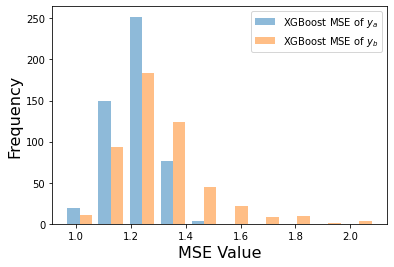

In [ ]:
plt.hist(mse_xgb,alpha=0.5)
plt.legend(('XGBoost MSE of $y_a$', 'XGBoost MSE of $y_b$'), loc='upper right');

plt.xlabel("MSE Value", fontsize=16)  
plt.ylabel("Frequency", fontsize=16)

**Comment:** We can see from the three histogram plot that, MSE of $y_b$ is significantly larger than $y_a$. For $y_a$, OLS regression did better as $y_a$ was generated in the way of linear type. However, in terms of $y_b$, the two classfication model did better and it is conform with the generation process. XGBoost did slightly better than the Random Forest in the classification process.

## Question 2: 

In [18]:
housing = pd.read_csv("/content/drive/MyDrive/MFE 431 DAML /housing.csv") #load_data
sample_n = 400
X = housing.drop(columns = ['medv','nox'])
y = housing[['medv']]
train_X,test_X = X[:sample_n],X[sample_n:]
train_y,test_y = y[:sample_n],y[sample_n:]

(a) Use random forest with n_estimators=250 and max_depth=10.
Once you run the random forest, use Python’s rf.predict function to obtain predicted
values for the test sample. What is the MSE of the prediction? Compare this to the
benchmark MSE generated by a model that has as its predicted house value the
mean house value in the test sample. As in the class notes, also report the Pseudo-R2
implied by these MSEs

In [32]:
rf = RandomForestRegressor(n_estimators=250,max_depth=10)
rf_res = rf.fit(train_X,train_y)
y_rf_pred = rf_res.predict(test_X)
MSE_RF = mean_squared_error(test_y, y_rf_pred)
# Compute pseudo r2
MSE_Baseline = np.mean(np.square((test_y - np.mean(test_y))))
PseudoR2 = 1 - MSE_RF / MSE_Baseline
print("MSE for Random Forest is {:.4}".format(MSE_RF))
print("MSE Baseline for Random Forest is {:.4}".format(MSE_Baseline['medv']))
print("Pseudo R2 for Random Forest is {:.2%}".format(PseudoR2['medv']))

MSE for Random Forest is 20.27
MSE Baseline for Random Forest is 28.26
Pseudo R2 for Random Forest is 28.27%


(b) Repeat the same exercise as above using XGBoost with learning_rate=0.1, gamma=0,
max_depth=6. Use 10 folds and 200 rounds for the cross-validation procedure. Make
sure that the output of the cross-validation procedure does not appear in your final
write-up.

In [39]:
xgb_regressor = xgb.XGBRegressor(
    booster = "gbtree",             # Which booster to use
    objective = "reg:squarederror", # Specify the learning task
    n_estimators = 999,             # Number of trees in random forest to fit
    reg_lambda = 10,                 # L2 regularization term
    gamma = 0,                      # Minimum loss reduction
    max_depth = 6,                  # Maximum tree depth
    learning_rate = 0.1             # Learning rate, eta 
  )
xgb_parm = xgb_regressor.get_xgb_params()
# Hyper parameter tuning for XGBOOST using cross-validation (maximal # of trees)
# XGBoost uses Dmatrices
xgb_train = xgb.DMatrix(train_X,label= train_y)
# Cross-validation
xgb_cvresult = xgb.cv(xgb_parm, xgb_train, 
                      num_boost_round = 200, 
                      metrics = "rmse",
                      nfold = 10,
                      stratified=False, 
                      seed=1,
                      early_stopping_rounds=20)

# Update parameters (# of trees)
xgb_regressor.set_params(n_estimators = xgb_cvresult.shape[0])

# Train the model
xgb_housing = xgb_regressor.fit(train_X,train_y)
y_xgb_pred = xgb_regressor.predict(test_X,ntree_limit = xgb_cvresult.shape[0])
MSE_XGB = mean_squared_error(test_y, y_xgb_pred)
# Compute pseudo r2
PseudoR2_xgb = 1 - MSE_XGB / MSE_Baseline
print("MSE for XGBoost is {:.4}".format(MSE_XGB))
print("Pseudo R2 for XGBoost is {:.2%}".format(PseudoR2_xgb['medv']))

MSE for XGBoost is 15.83
Pseudo R2 for XGBoost is 43.97%


(c) Repeat the exercise in part (a) using elastic net with l1_ratio=0.5. Use a crossvalidation
procedure to find an optimal lambda (alpha). For that exercise, split the
training sample into quarters (i.e., the 4-fold cross-validation).
Comment on the performance of the linear model relative to decision trees. In
particular, get the MSE for the test sample and compute the Pseudo-R2 relative to
the benchmark MSE from a).

In [40]:
parametersGrid = {'alpha': (10 ** np.linspace(10, -10, 500) * 0.002)}
eNet = ElasticNet(l1_ratio=0.5,max_iter=10^6)
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=4)
indx = ~np.isnan(train_X).any(axis=1)
X_train = train_X[indx]
Y_train = train_y[indx]
grid.fit(X_train, Y_train)
Y_pred_Enet = grid.predict(test_X)
MSE_ENet = mean_squared_error(test_y, Y_pred_Enet)
# Compute pseudo r2
PseudoR2_enet = 1 - MSE_ENet / MSE_Baseline
print("MSE for Elastic Net is {:.4}".format(MSE_ENet))
print("Pseudo R2 for Elastic Net is {:.2%}".format(PseudoR2_enet['medv']))

MSE for Elastic Net is 30.1
Pseudo R2 for Elastic Net is -6.52%


**Comment:** In terms of the Psuedo $R^2$ we can see that the regression is better than the linear model.

(d) Repeat the exercise in part (c) but use log transformations of the following
variables: indus, rm, rad, pt, and lstat. Drop the original variables from your model.
Comment on the performance of this version of the linear model relative to decision
trees in this case.

In [42]:
housing_log= pd.concat([housing,housing[['indus','rm','rad','ptratio','lstat']].apply(np.log, axis=1).add_suffix('log')],axis=1)
X_log = housing_log.drop(columns = ['medv','nox','indus','rm','rad','ptratio','lstat'])
y_log = housing_log[['medv']]
train_log_X,test_log_X = X_log[:sample_n],X_log[sample_n:]
train_log_y,test_log_y = y_log[:sample_n],y_log[sample_n:]

In [43]:
parametersGrid = {'alpha': (10 ** np.linspace(10, -10, 500) * 0.002)}
eNet = ElasticNet(l1_ratio=0.5,max_iter=10^6)
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_squared_error', cv=4)
indx = ~np.isnan(train_log_X).any(axis=1)
X_train_log = train_log_X[indx]
Y_train_log = train_log_y[indx]
grid.fit(X_train_log, Y_train_log)
Y_pred_Enet_log = grid.predict(test_log_X)
MSE_ENet_log = mean_squared_error(test_log_y, Y_pred_Enet_log)
# Compute pseudo r2
PseudoR2_enet_log = 1 - MSE_ENet_log / MSE_Baseline
print("MSE for Elastic Net after log transformation is {:.4}".format(MSE_ENet_log))
print("Pseudo R2 for Elastic Net after log transformation is {:.2%}".format(PseudoR2_enet_log['medv']))

MSE for Elastic Net after log transformation is 15.25
Pseudo R2 for Elastic Net after log transformation is 46.03%


**Comment:** After the log transformation, in terms of Psuedo $R^2$ it did bettern than the decision tree.